In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [28]:
df = pd.read_excel('Tweets_kasitelty.xlsx')
df.head()

,Määrä,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,4,570000000000000000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica it's really aggressive to blast...,NaN,NaT,NaN,NaN
1,5,570000000000000000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:00,NaN,Pacific Time (US & Canada)
2,6,570000000000000000,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica seriously would pay $30 a fligh...,NaN,NaT,NaN,NaN
3,17,570000000000000000,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0.0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:00,"palo alto, ca",Pacific Time (US & Canada)
4,19,570000000000000000,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0.0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:00,this place called NYC,Eastern Time (US & Canada)


In [31]:
df.describe()

,Määrä,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,14616.000000,1.461600e+04,14616.000000,10503.000000,14608.000000
mean,7428.178982,5.692606e+17,0.900095,0.638148,0.082694
std,4284.282845,8.098925e+14,0.162877,0.330465,0.746508
min,1.000000,5.680000e+17,0.335000,0.000000,0.000000
25%,3722.750000,5.690000e+17,0.692300,0.360600,0.000000
50%,7448.500000,5.690000e+17,1.000000,0.670600,0.000000
75%,11125.250000,5.700000e+17,1.000000,1.000000,0.000000
max,14848.000000,5.700000e+17,1.000000,1.000000,44.000000


In [49]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['airline_sentiment'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

,lkm,%
airline_sentiment,,
negative,9160,62.7 %
neutral,3096,21.2 %
positive,2360,16.1 %
Yhteensä,14616,100.0 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %')]

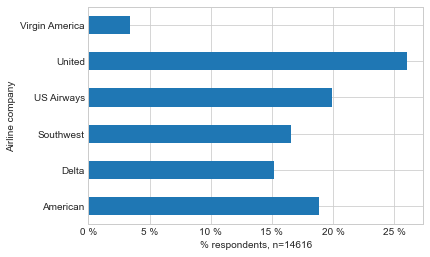

In [42]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['airline'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['%'].plot.barh()

# y-akselin otsikko
ax1.set_ylabel("Airline company")

# x-akselin otsikko
ax1.set_xlabel('% respondents, n=' + str(n))

# x-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

# Kaavion tallentaminen
#plt.savefig('frekvenssi.png', bbox_inches='tight')

[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %')]

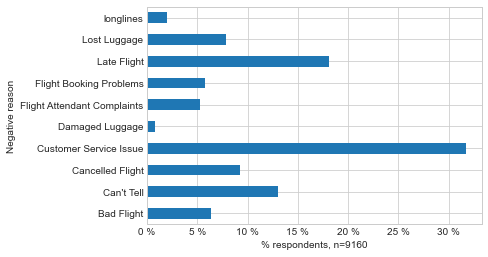

In [43]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['negativereason'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['%'].plot.barh()

# y-akselin otsikko
ax1.set_ylabel("Negative reason")

# x-akselin otsikko
ax1.set_xlabel('% respondents, n=' + str(n))

# x-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

# Kaavion tallentaminen
#plt.savefig('frekvenssi.png', bbox_inches='tight')

[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %')]

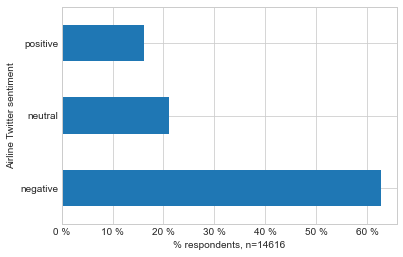

In [40]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['airline_sentiment'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['%'].plot.barh()

# y-akselin otsikko
ax1.set_ylabel("Airline Twitter sentiment")

# x-akselin otsikko
ax1.set_xlabel('% respondents, n=' + str(n))

# x-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

# Kaavion tallentaminen
#plt.savefig('frekvenssi.png', bbox_inches='tight')

In [44]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['user_timezone'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

,lkm,%
user_timezone,,
Abu Dhabi,17,0.2 %
Adelaide,7,0.1 %
Alaska,103,1.1 %
America/Atikokan,1,0.0 %
America/Boise,3,0.0 %
America/Chicago,36,0.4 %
America/Detroit,1,0.0 %
America/Los_Angeles,14,0.2 %
America/New_York,23,0.3 %


In [47]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['airline_sentiment'], 'airline')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['airline'].sum()
df1['%'] = (df1['airline']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'airline': '{:.0f}', '%': '{:.1f} %'})

,airline,%
airline_sentiment,,
negative,9160,62.7 %
neutral,3096,21.2 %
positive,2360,16.1 %
Yhteensä,14616,100.0 %
